In [7]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [8]:
diabetes = datasets.load_diabetes()
# dataset : http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# features: age, sex, body mass index, average blood pressure, blood serum measurements 1 -> 6
# target : "quantitative measure of disease progression one year after baseline"
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  1

In [10]:
X = diabetes.data # keep only one feature
y = diabetes.target
print("X: " + str(X.shape))
print("y: " + str(y.shape))

X: (442, 10)
y: (442,)


In [11]:
X = np.insert(X, 0, 1, axis=1) # insert a column of "1"s in first position
Xt = np.transpose(X) # or X.T
pinv = np.linalg.pinv(Xt.dot(X))
theta = pinv.dot(Xt).dot(y)
print("theta : " + str(theta))

theta : [ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]


In [12]:
error = y - X.dot(theta)
print("J(a,b) = " + str(error.dot(error) / (2 * error.shape[0])))

J(a,b) = 1429.84519938


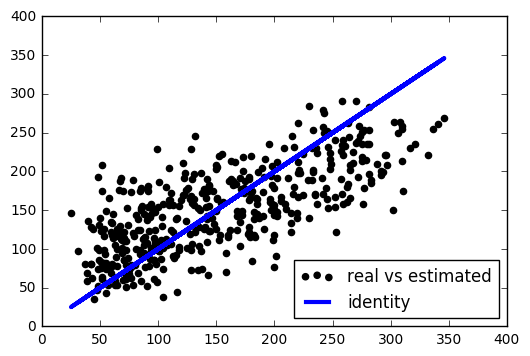

In [13]:
scatter = plt.scatter(y, X.dot(theta),  color='black', label='real vs estimated')
line, = plt.plot(y, y, color='blue', linewidth=3, label='identity')
plt.legend(handles=[scatter, line], loc='lower right')
plt.show()